In [2]:
import pandas as pd

df = pd.read_csv('../Data/k8s-test/results.csv')
convert = lambda arr: [float(x.split('m')[0])*60 + float(x.split('m')[1].split('s')[0]) for x in arr]
df['arm32'] = convert(df['arm32'].tolist())
df['amd64'] = convert(df['amd64'].tolist())

df_std = df.groupby(by=['operation']).std()
df_std = df_std.rename(columns={'arm32': 'arm32-std', 'amd64': 'amd64-std'})
df = df.groupby(by=['operation']).mean()
df = df.merge(df_std, on=['operation']).reset_index()

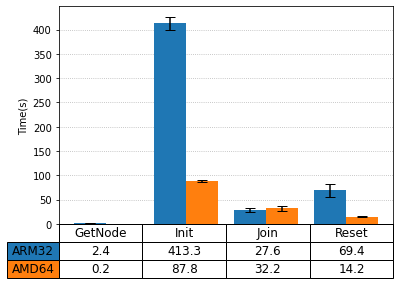

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(4)
# plt.xticks(x, df['operation'], rotation=0)
plt.xticks([])
total_width, n = 0.8, 2
width = total_width / n

x = x - (total_width - width) / 2

cell_text = []
all_colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
plt.bar(x, df['arm32'], yerr=df['arm32-std'], width=width, label='ARM32', capsize=5)
cell_text.append(['%.1f' % x for x in df['arm32']])

plt.bar(x+width, df['amd64'], yerr=df['amd64-std'], width=width, label='AMD64', capsize=5)
cell_text.append(['%.1f' % x for x in df['amd64']])

archs = ['ARM32', 'AMD64']
# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=archs,
                      cellLoc='center',
                      rowColours=all_colors[:len(archs)],
                      colLabels=df['operation'],
                      loc='bottom')
the_table.set_fontsize(12)
the_table.scale(1, 1.5)

# plt.xlabel('Operation')
plt.ylabel('Time(s)')
# plt.legend()
plt.rc('axes', axisbelow=True)
plt.grid(axis='y', linestyle=':')
plt.show()